Ссылка на Git-Hub: https://github.com/kkrrmmbbrrgg/supervised-learning

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Требуется разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


### Описание данных

#### market_file.csv
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    
    id — номер покупателя в корпоративной базе данных.
    Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

#### market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    id — номер покупателя в корпоративной базе данных.
    Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    Выручка — сумма выручки за период.

#### market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

    id — номер покупателя в корпоративной базе данных.
    Период — название периода, во время которого зафиксировано общее время.
    минут — значение времени, проведённого на сайте, в минутах.

#### money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

    id — номер покупателя в корпоративной базе данных.
    Прибыль — значение прибыли.

## Загрузка данных

In [1]:
!pip install --upgrade numba

In [2]:
!pip install numpy==1.24.0

In [3]:
!pip install scikit-learn==1.1.3

In [4]:
!pip install shap -q

In [5]:
!pip -q install phik

In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
import numpy as np


In [7]:
import seaborn as sns

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
import shap
import phik
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="phik") #Подавление предупреждений (временное решение)
warnings.filterwarnings("ignore", category=UserWarning, module="shap") #Подавление предупреждений (временное решение)

In [9]:
from sklearn.inspection import permutation_importance

In [10]:
import requests

In [11]:
pth1 = 'https://code.s3.yandex.net/datasets/market_file.csv'
pth2 = 'https://code.s3.yandex.net/datasets/market_money.csv'
pth3 = 'https://code.s3.yandex.net/datasets/market_time.csv'
pth4 = 'https://code.s3.yandex.net/datasets/money.csv'

In [12]:
try:
    response = requests.head(pth1)
    if response.status_code == 200:
        market_file = pd.read_csv(pth1)
        print('market_file.csv loaded')

    response = requests.head(pth2)
    if response.status_code == 200:
        market_money = pd.read_csv(pth2)
        print('market_money.csv loaded')


    response = requests.head(pth3)
    if response.status_code == 200:
        market_time = pd.read_csv(pth3)
        print('market_time.csv loaded')

    response = requests.head(pth4)
    if response.status_code == 200:
        money = pd.read_csv(pth4, sep=';', decimal=",")
        print('money.csv loaded')

except requests.exceptions.RequestException as e:
    print('Eror: some files are missing') 

market_file.csv loaded
market_money.csv loaded
market_time.csv loaded
money.csv loaded


#### Посмотрим, что вообще загрузилось в датафреймы и как они выглядят

In [13]:
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Нормально, датафреймы загружены, с разделителями косяков нет, данные читаемы, пора обрабатывать

##  Предобработка данных

In [14]:
#функция для удобного просмотра инфы о датафрейме
def dframe_info(df, name=''):
    print(name)
    display(df.head())
    display(df.info())
    display(df.describe())
    print('_______________________________________________')
    
    
#функция чтобы удобно выбрасывать дубликаты
def duplicate_drop(df):
    print('Обнаружено явных дубликатов:', df.duplicated().sum())
    if df.duplicated().sum() > 0:
        df.drop_duplicates(inplace=True)
        print('Явные дубликаты уничтожены!')
        print('')
    else:    
        print('Явные дубликаты не обнаружены!')
        print('')
        
#функция чтобы убрать пробелы из названий и преобразовать тип данных столбца
def make_df_great_again(df, columns=None):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    if columns is not None:
        for col in columns:
            try:
                df[col] = pd.to_numeric(df[col], errors='raise')
            except (ValueError, TypeError) as e:
                print(f"Ошибка преобразования столбца '{col}' в float64: {e}")
    display(df.head(3))

#### Посмотрим детальнее, что находится в датасетах, при необходимости откорректируем

In [15]:
dframe_info(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


_______________________________________________


Подводя итог по датафрейму:
1. Пропусков нет - число значений в столбцах (1300) соответствует числу строк
2. Типы данных похожи на правду, в корректировке не нуждаются
3. Названия столбцов содержат пробелы, это поправим

Приведем названия столбцов к красивому виду

In [16]:
make_df_great_again(market_file)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


Удалим явные дубликаты, если они нам встретятся:

In [17]:
duplicate_drop(market_file)


Обнаружено явных дубликатов: 0
Явные дубликаты не обнаружены!



In [18]:
df = market_file
print('Неявных дубликатов найдено: ', df[df.drop(columns=['id']).duplicated(keep=False)].shape[0])
display(df[df.drop(columns=['id']).duplicated(keep=False)])

Неявных дубликатов найдено:  22


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
337,215685,Снизилась,стандарт,нет,4.4,5,517,0.23,Товары для детей,1,2,5,11
338,215686,Снизилась,стандарт,нет,4.3,4,460,0.16,Техника для красоты и здоровья,2,1,3,6
339,215687,Снизилась,стандарт,да,3.9,4,627,0.24,Товары для детей,3,3,7,8
340,215688,Снизилась,стандарт,да,5.5,4,703,0.14,Мелкая бытовая техника и электроника,2,1,3,7
341,215689,Снизилась,стандарт,нет,5.0,4,136,0.27,Товары для детей,3,4,4,17
342,215690,Снизилась,стандарт,да,4.8,4,907,0.30,Косметика и аксесуары,2,1,1,6
343,215691,Снизилась,стандарт,нет,3.9,5,600,0.17,Домашний текстиль,1,7,4,10
344,215692,Снизилась,стандарт,да,3.3,3,871,0.20,Техника для красоты и здоровья,2,4,2,17
345,215693,Снизилась,стандарт,да,5.6,5,574,0.28,Домашний текстиль,3,2,3,9
346,215694,Снизилась,премиум,да,5.5,5,982,0.94,Мелкая бытовая техника и электроника,3,1,8,10


Неявные дубликаты (без учета ID) вроде как бы и есть - но 22 строки на 1300 строк целого датафрейма это такие мелочи, что даже если это и настоящие дубликаты, я их оставлю, пожалуй

Рассмотрим следующий датафрейм

In [19]:
dframe_info(market_money, 'market_money')

market_money


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


_______________________________________________


In [20]:
make_df_great_again(market_money)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [21]:
duplicate_drop(market_money)

Обнаружено явных дубликатов: 0
Явные дубликаты не обнаружены!



Подводя итог по датафрейму:
1. Пропусков нет - число значений в столбцах (3900) соответствует числу строк
2. Типы данных похожи на правду, в корректировке не нуждаются
3. Названия столбцов в порядке, но были приведены к нижнему регистру

In [22]:
dframe_info(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


_______________________________________________


In [23]:
make_df_great_again(market_time)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


In [24]:
duplicate_drop(market_time)

Обнаружено явных дубликатов: 0
Явные дубликаты не обнаружены!



Подводя итог по датафрейму:
1. Пропусков нет - число значений в столбцах (2600) соответствует числу строк
2. Типы данных похожи на правду, в корректировке не нуждаются
3. Названия столбцов в порядке, но были приведены к нижнему регистру

In [25]:
dframe_info(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


_______________________________________________


In [26]:
make_df_great_again(money)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


In [27]:
duplicate_drop(money)

Обнаружено явных дубликатов: 0
Явные дубликаты не обнаружены!



Подводя итог по датафрейму:
1. Пропусков нет - число значений в столбцах (1300) соответствует числу строк
2. Типы данных похожи на правду, в корректировке не нуждаются
3. Названия столбцов в порядке, но были приведены к нижнему регистру

### Вывод раздела

Датафреймы прошли предобработку - пропусков в данных не обнаружено, типы данных определены верно, названия столбцов приведены к удобовотворимому виду, хотя и были оставлены кириллическими, явные дубликаты обнаружены не были, неявные дубликаты датафрейма market_info было принято решение не трогать ввиду их малочисленности

## Исследовательский анализ данных

#### Исследуем данные путем их визуализации. У нас есть 2 вида столбцов - с категориальными и численными значениями. 

In [28]:
#Создадим функцию для удобного анализа численных значений
def digit_var(df, column, title=' ', bins=15, color='lightblue'):
    
    plt.figure(figsize=(15, 5))

# Гистограмма
    plt.subplot(1, 2, 1)
    k=(df[column].max()-df[column].min())/100
    plt.hist(df[column], bins=bins, color=color, edgecolor='black')
    plt.axvspan(df[column].median()-k, df[column].median()+k, color = 'lightpink', alpha=0.5)
    plt.title(f'Гистограмма {title}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel(column, fontsize=12)

# Диаграмма с усиками
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column], vert=True, patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(f'Диаграмма с усиками {title}', fontsize=14)
    plt.xlabel(column, fontsize=12)

    plt.show()

# Описание данных
    print(title)
    display(df[column].describe())

In [29]:
# Создадим удобную функцию для анализа категориальных значений
def categ_var(df, column, title, color):

# Столбчатая диаграмма
    df[column].value_counts().plot(kind='bar', figsize=(15, 5), color=color, edgecolor='black')
    
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.xticks(rotation=0)
    plt.ylabel(column, fontsize=12)

#Описание данных    
    print(title)
    display(df[column].value_counts())

#### Рассмотрим датафрейм market_file

In [30]:
display(market_file.head())


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Столбчатая диаграмма покупательской активности


Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

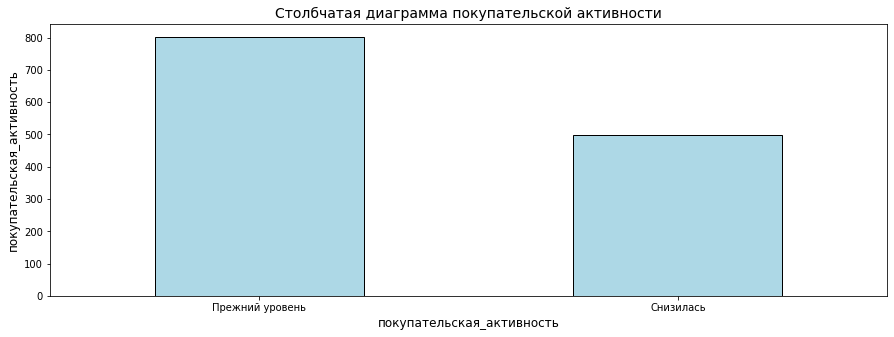

In [31]:
categ_var(market_file, 'покупательская_активность', 'Столбчатая диаграмма покупательской активности', 'lightblue')

Есть заметный перевес в сторону прежнего уровня

Столбчатая диаграмма типа сервиса


стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

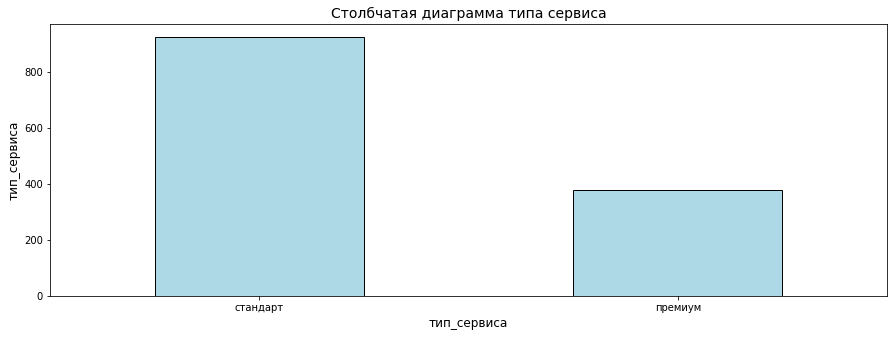

In [32]:
#Есть ошибка в данных - стандартт вместо стандарт, фиксим
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

categ_var(market_file, 'тип_сервиса', 'Столбчатая диаграмма типа сервиса', 'lightblue')

Есть заметный перевес в пользу пользователей без премиума

Столбчатая диаграмма разрешения о сообщении


да     962
нет    338
Name: разрешить_сообщать, dtype: int64

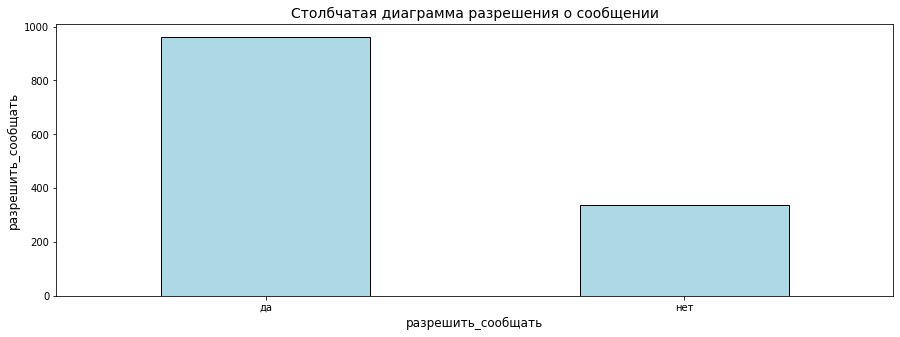

In [33]:
categ_var(market_file, 'разрешить_сообщать', 'Столбчатая диаграмма разрешения о сообщении', 'lightblue')

Есть заметный перевес в пользу разрешения сообщать

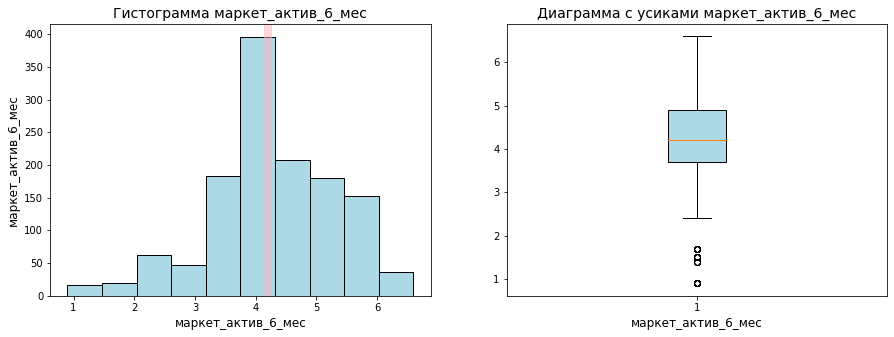

маркет_актив_6_мес


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

In [34]:
digit_var(market_file, 'маркет_актив_6_мес', 'маркет_актив_6_мес', 10, 'lightblue')

Впринципе распределение похоже на нормальное, но есть довольно много малых значений

In [35]:
print('Пользователей с маркет актив 6 мес меньше 2: ', market_file[market_file['маркет_актив_6_мес'] < 2].shape[0])
display((market_file[market_file['маркет_актив_6_мес'] < 2]).head())

Пользователей с маркет актив 6 мес меньше 2:  36


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
30,215378,Снизилась,стандарт,да,1.7,3,488,0.39,Техника для красоты и здоровья,5,1,4,3
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7
38,215386,Снизилась,стандарт,да,1.5,3,495,0.98,Домашний текстиль,2,3,7,5
47,215395,Снизилась,премиум,да,1.5,5,645,0.27,Товары для детей,3,3,6,5
55,215403,Снизилась,премиум,да,1.7,5,771,0.39,Техника для красоты и здоровья,1,8,2,5


Можно вырезать, конечно, но можно и оставить, вроде не криминально

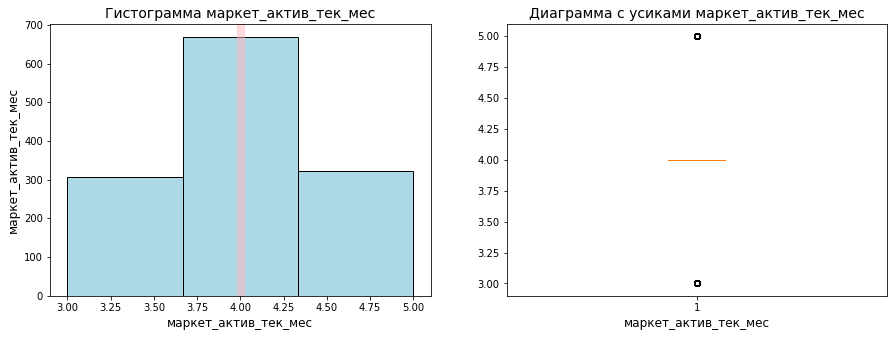

маркет_актив_тек_мес


count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

In [36]:
digit_var(market_file, 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 3, 'lightblue')

Признак больше похож на категориальный, можно переделать впоследствии

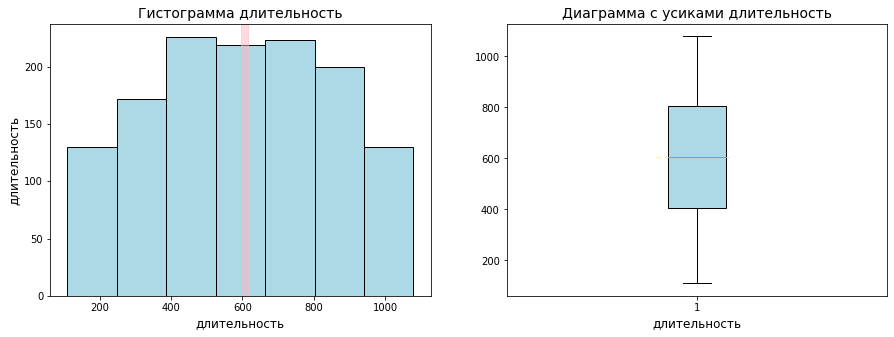

длительность


count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

In [37]:
digit_var(market_file, 'длительность', 'длительность', 7, 'lightblue')

Распределение близко к нормальному, выбросов не замечено

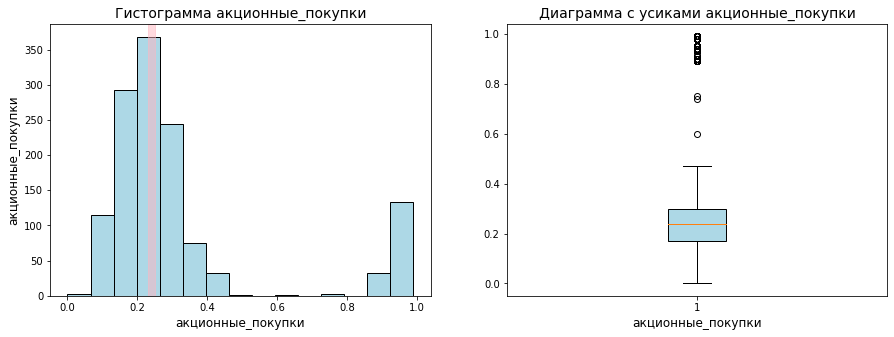

акционные_покупки


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [38]:
digit_var(market_file, 'акционные_покупки', 'акционные_покупки', 15, 'lightblue')

"выбросы" справа не выбросы - скорее всего это люди, которые внимательно следят за  скидками. В принципе этот признак тоже можно будет превратить в категориальный, даже граница между группами тех, кто по скидкам покупает часто и редко довольно четко видна

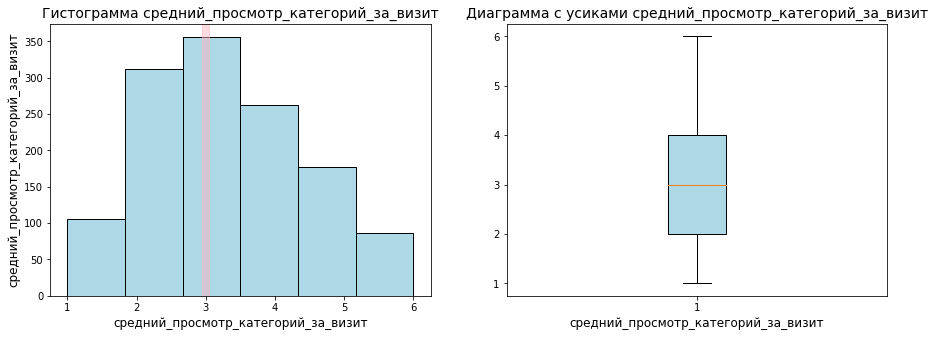

средний_просмотр_категорий_за_визит


count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [39]:
digit_var(market_file, 'средний_просмотр_категорий_за_визит', 'средний_просмотр_категорий_за_визит', 6, 'lightblue')

Нормальное распределение

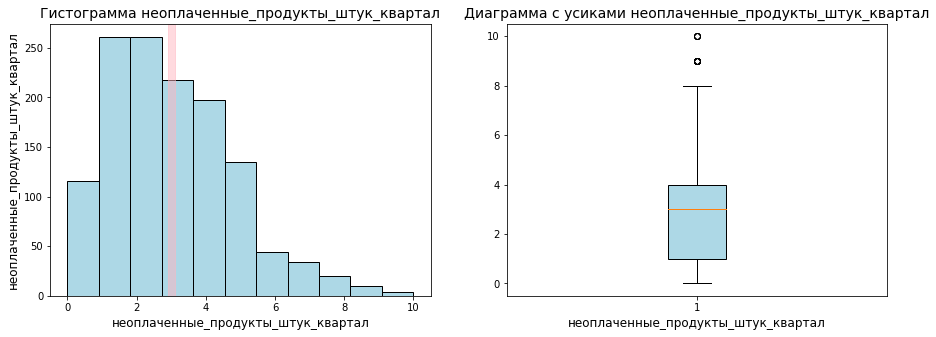

неоплаченные_продукты_штук_квартал


count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [40]:
digit_var(market_file, 'неоплаченные_продукты_штук_квартал', 'неоплаченные_продукты_штук_квартал', 11, 'lightblue')

Вполне предсказуемый перекос в сторону низкого числа неоплаченных покупок, наблюдается несколько выбросов от плюшкиных, делать с ними ничего не нужно

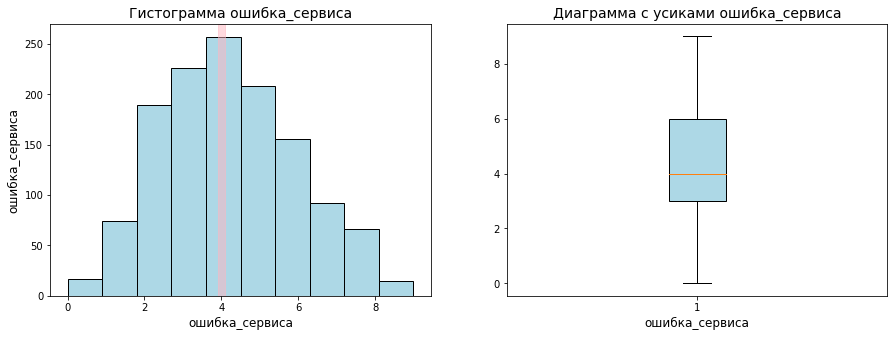

ошибка_сервиса


count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

In [41]:
digit_var(market_file, 'ошибка_сервиса', 'ошибка_сервиса', 10,  'lightblue')

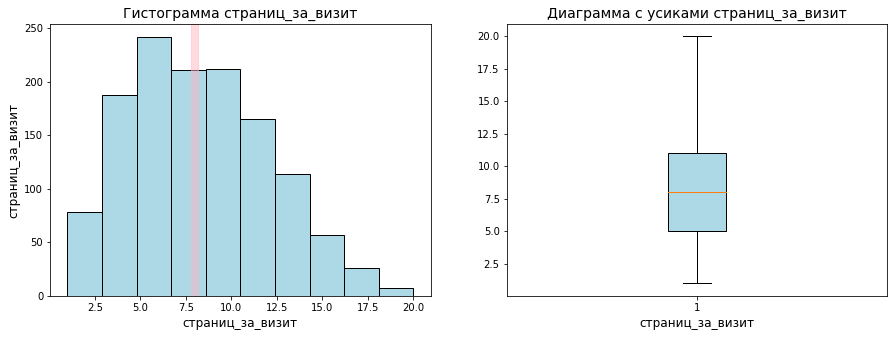

страниц_за_визит


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

In [42]:
digit_var(market_file, 'страниц_за_визит', 'страниц_за_визит', 10,  'lightblue')

Нормальное распределение в последних двух признаках, у страниц за визит легкий перекос влево, в меньшую сторону, что весьма предсказуемо - многие ищут конкретный товар. Выбросов также нет

Итого - было проанализировано содержание столбца каждого из признаков, для которых было исправлено несколько ошибок в названиях содержимого, найдено несколько признаков, которые в случае нужды из численных можно будет перевести в категориальные, отброшен ряд значений, явно выбивающихся за границы нормальных. С датафреймом можно работать

#### Рассмотрим датафрейм market_money

In [43]:
display(market_money.head())

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


период


препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: период, dtype: int64

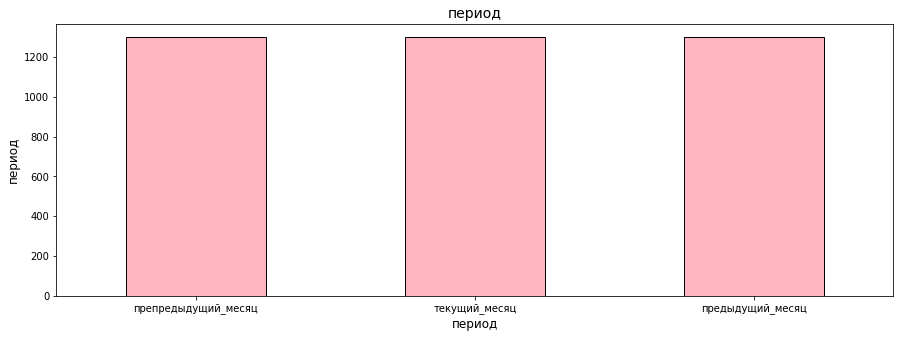

In [44]:
categ_var(market_money, 'период', 'период', 'lightpink')

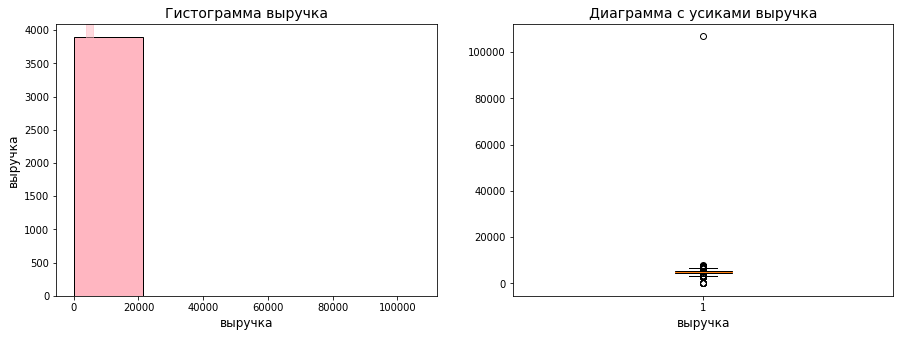

выручка


count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [45]:
digit_var(market_money, 'выручка', 'выручка', 5,  'lightpink')

Здесь явный выброс, ну-ка найдем

In [46]:
display(market_money.sort_values(by = ['выручка'], ascending = False).head(3))
display(market_money.sort_values(by = ['выручка'], ascending = True).head(3))
print(market_money[market_money['выручка'] == 0].shape[0])

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0


6


Здесь все очевидно - вычеркиваем выброс сверху. Кроме того выкинем пользователей без выручки - такие записи в исследовании активных пользователей не нужны

In [47]:
market_money = market_money[market_money['выручка'] < 10000]
market_money = market_money[market_money['выручка'] > 0]

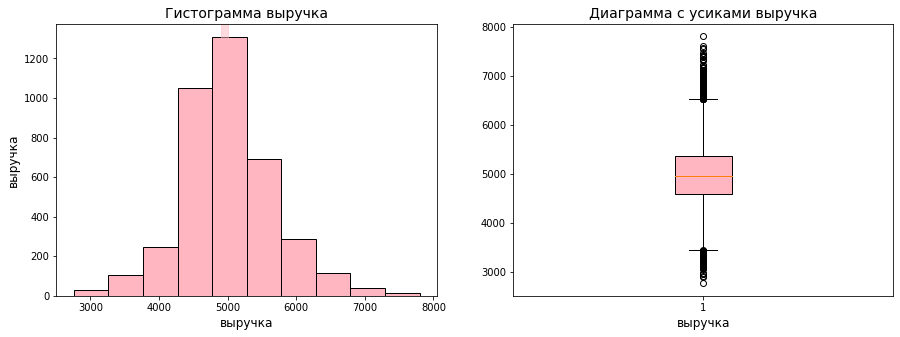

выручка


count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

In [48]:
digit_var(market_money, 'выручка', 'выручка', 10,  'lightpink')

#### Рассмотрим датафрейм market_time

In [49]:
display(market_time.head(3))

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


период


предыдцщий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

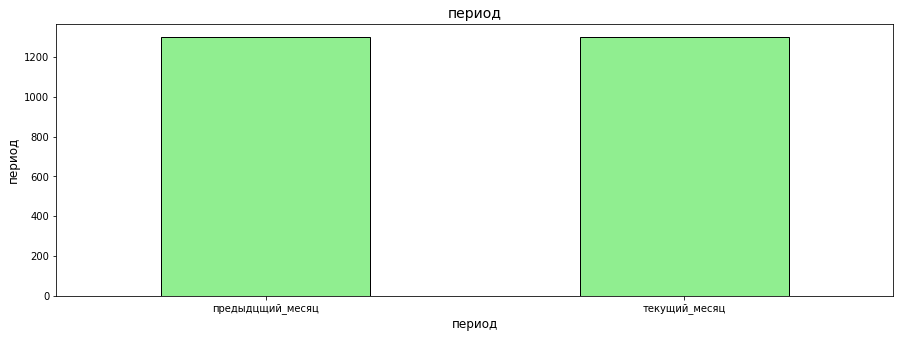

In [50]:
categ_var(market_time, 'период', 'период', 'lightgreen')

Замечена очепятка в предыдЦщем месяце - правим

In [51]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

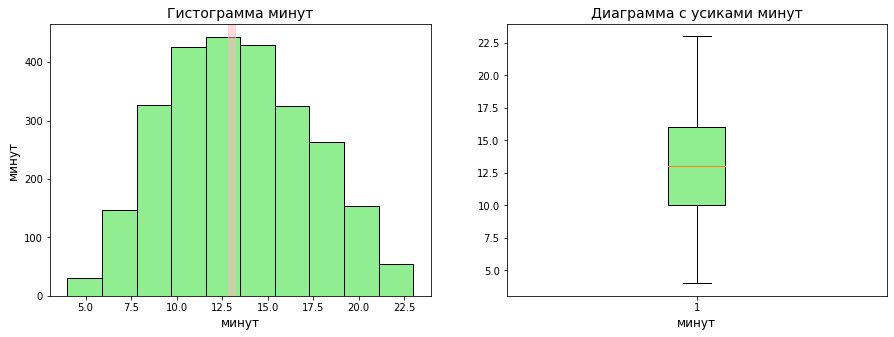

минут


count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [52]:
digit_var(market_time, 'минут', 'минут', 10,  'lightgreen')

Все нормально... во всех смыслах.

#### Рассмотрим датафрейм money

In [53]:
display(money.head(3))

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


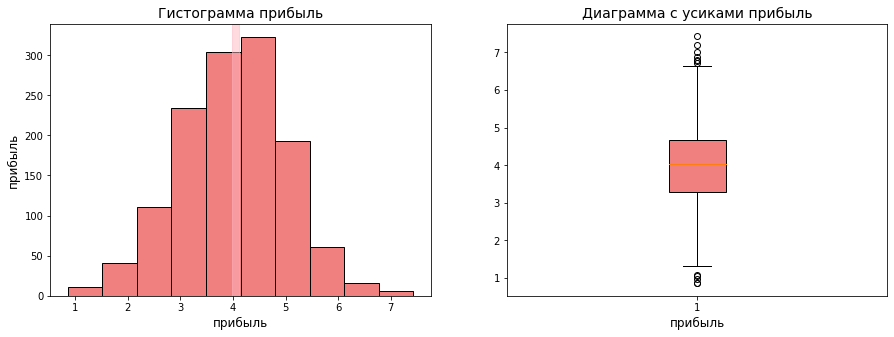

прибыль


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [54]:
digit_var(money, 'прибыль', 'прибыль', 10,  'lightcoral')

Распределение нормальное

In [55]:
agg_dict = {'период': ['count']}
good_id = market_money.groupby('id').agg(agg_dict)
good_id.columns = ['count']
good_id = good_id[good_id['count'] == 3]

market_file = market_file[market_file['id'].isin(good_id.index)]
print('Осталось пользователей: ', market_file.shape[0])

Осталось пользователей:  1296


### Вывод раздела
В данном пункте работы был проведлен анализ данных, в ходе которого данные были детально изучены и приведены "в порядок" - самые аномальные значения убраны, самые опечатанные значения перепечатаны, немыслимые признаки - осмыслены, и приведены к нормальному распределению, оставили только нужную группу пользователей, то есть самую активную.В общем и целом данные сейчас выглядят хорошо, можно и нужно работать дальше. 

## Объединение таблиц

Объединим таблицы market_file, market_money и market_time. Данные о прибыли из файла money.csv при моделировании нам не понадобятся. Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [56]:
market_time_pivot = market_time.pivot_table(index=['id'], columns=["период"])
market_time_pivot.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_pivot = market_time_pivot.reset_index() 

market_money_pivot = market_money.pivot_table(index=['id'], columns=["период"])
market_money_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_pivot = market_money_pivot.reset_index() 

market_total = pd.merge(market_file, market_time_pivot, on='id', how='left', suffixes=('', '_минут'))
market_total = pd.merge(market_total, market_money_pivot, on='id', how='left', suffixes=('', '_выручка'))
display(market_total.head(3))
print(market_total.shape)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4


(1296, 18)


## Корреляционный анализ

Вычислим матрицу корреляций Phik для всех числовых и категориальных столбцов датафрейма market_total

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


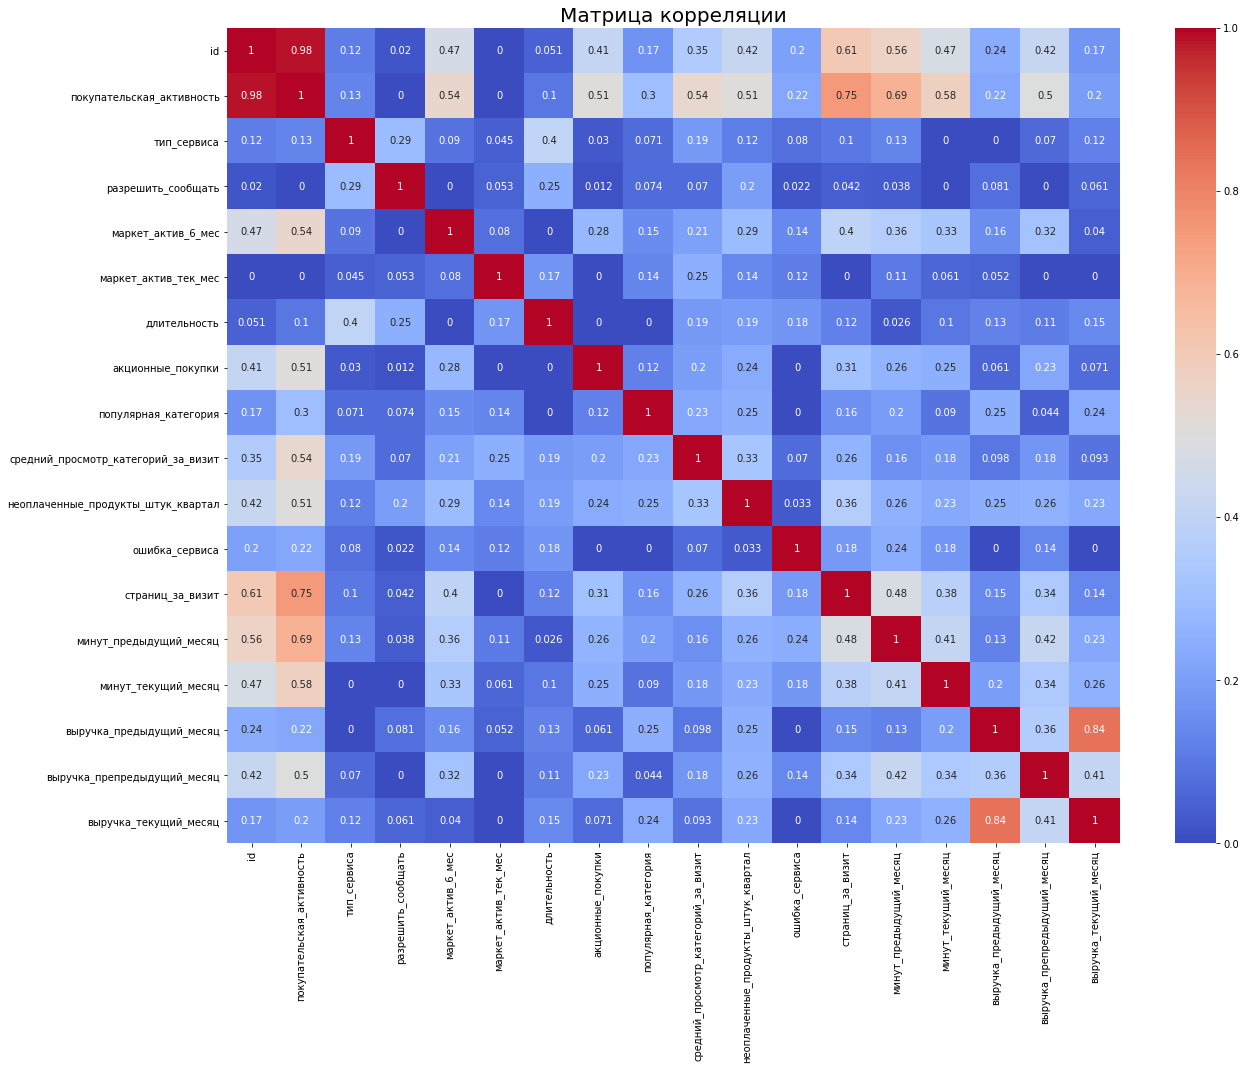

In [57]:
corr_matrix = market_total.phik_matrix()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Матрица корреляции', fontsize = 20)
plt.show()

Целевой признак - покупательская активность. Построим для каждого из ее значений (снизилась и на_прежнем_уровне phik матрицы)

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


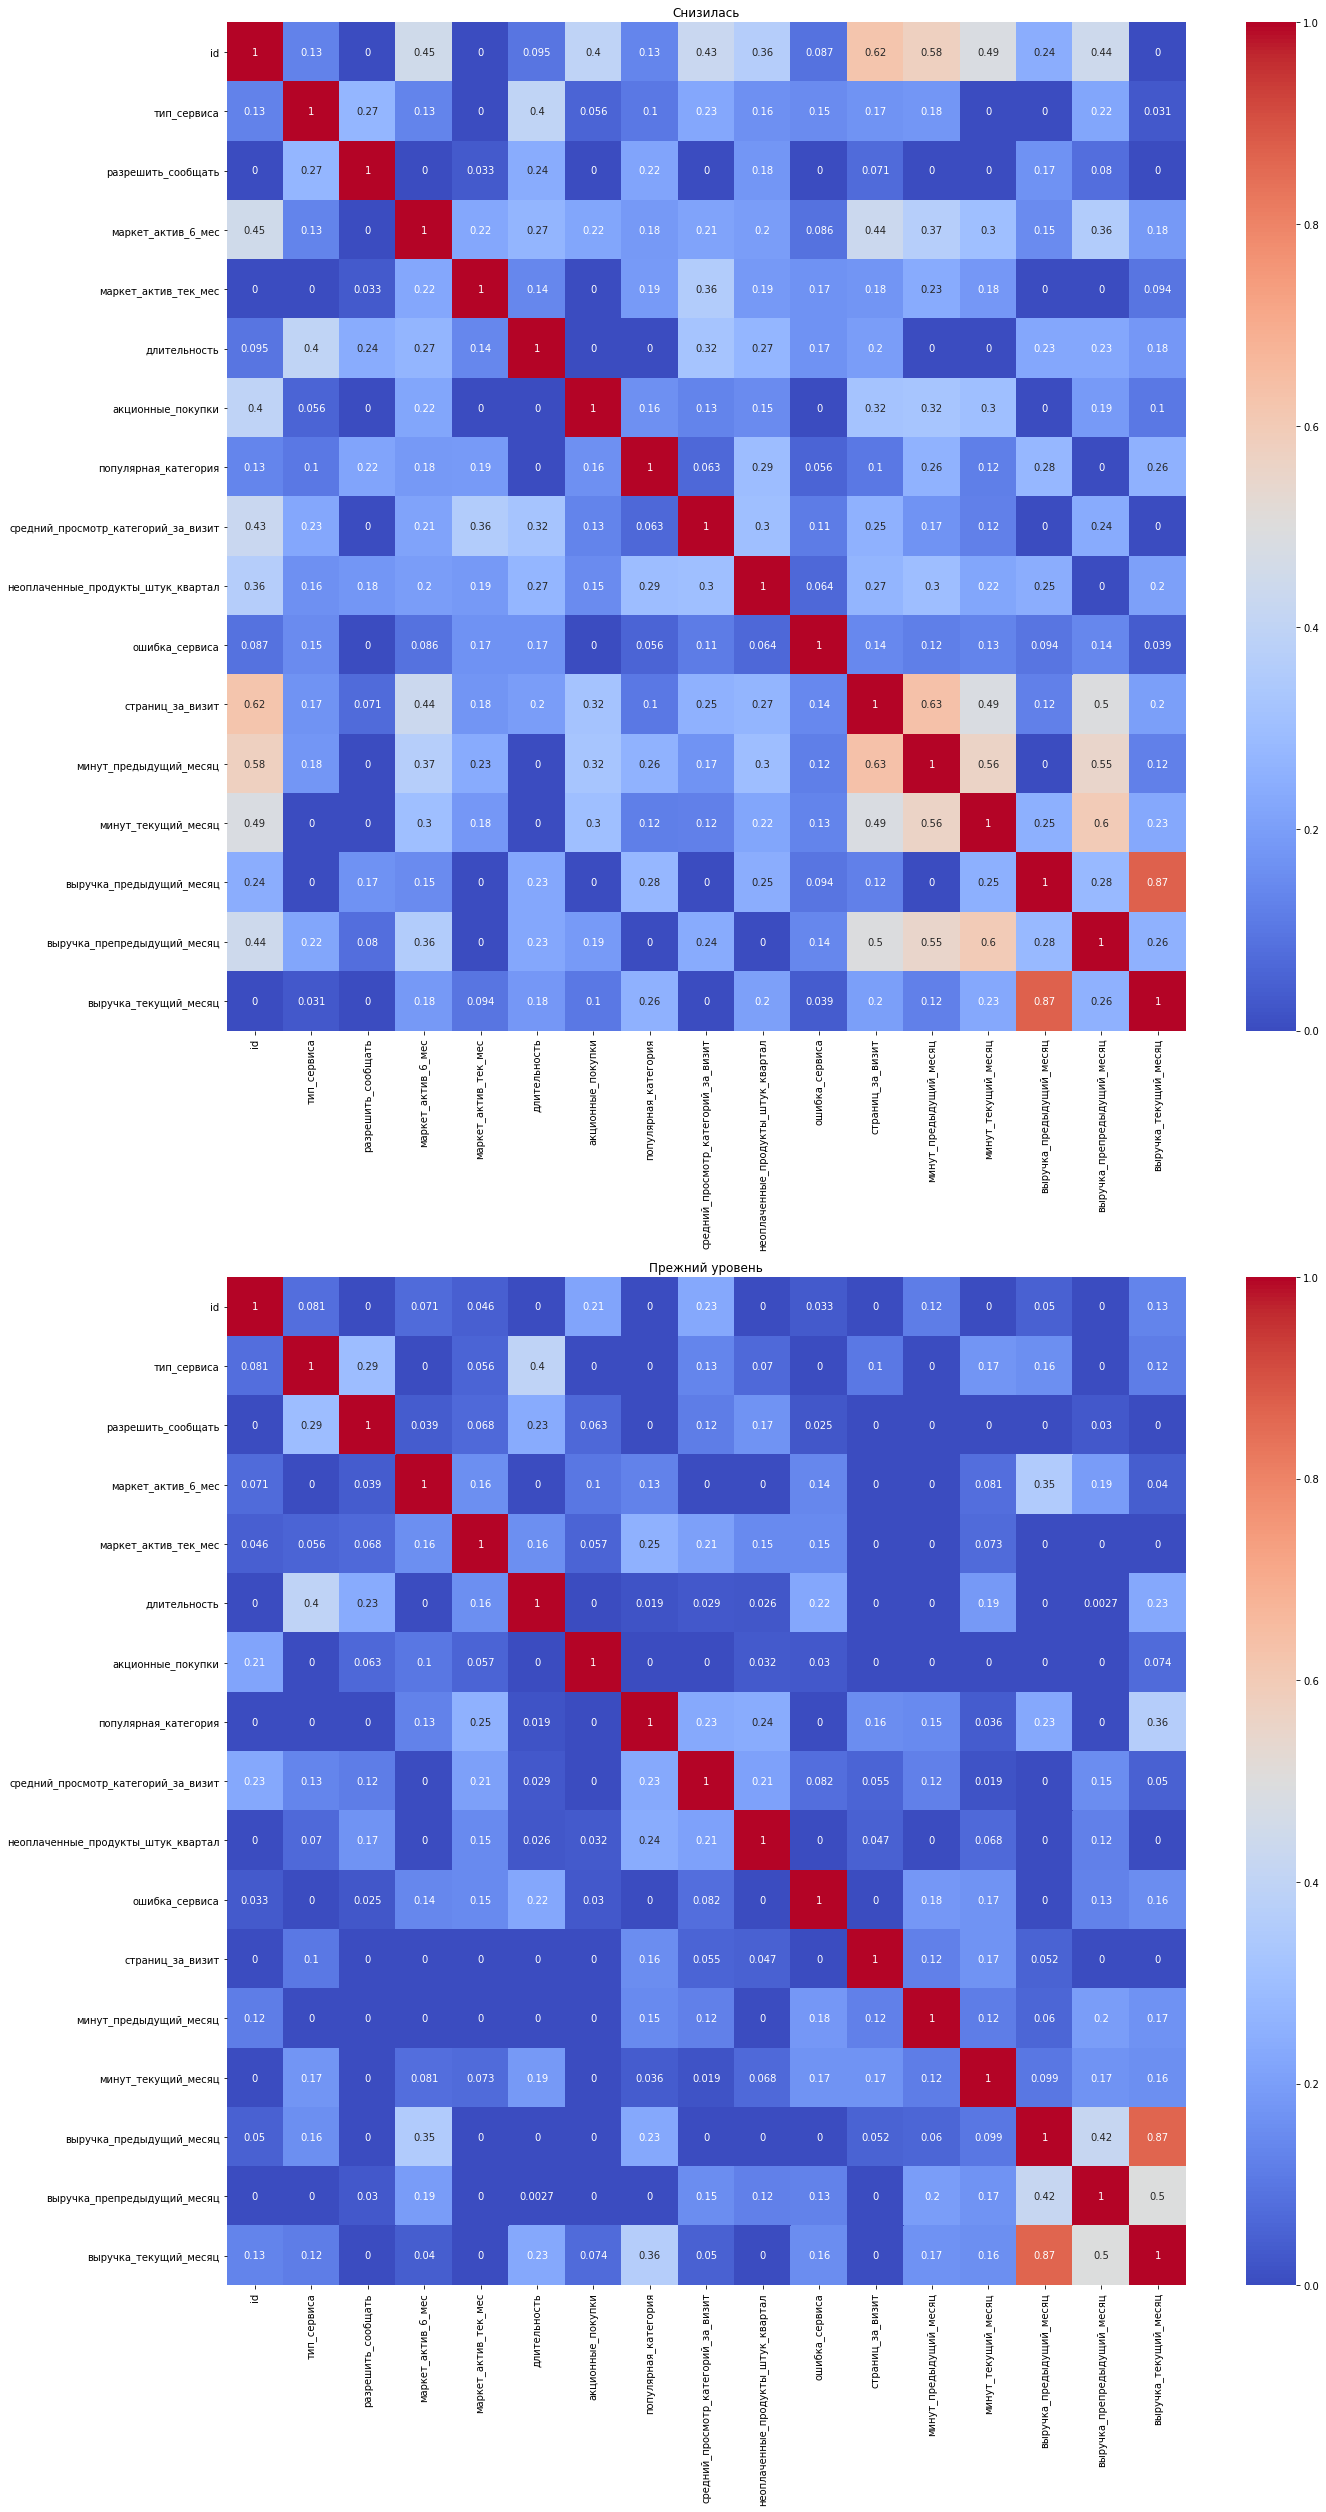

In [58]:
ax_col = 0
ax_row = 0

fig, axs = plt.subplots(ncols=1, nrows=market_total['покупательская_активность'].nunique(), figsize=(20,35))
for i in df['покупательская_активность'].unique():
    market_total_i = market_total[market_total['покупательская_активность'] == i]
    sns.heatmap(market_total_i.phik_matrix(), annot=True, cmap='coolwarm', ax=axs[ax_col])
    plt.title('покупательская_активность', fontsize = 16)
    axs[ax_col].set_title(i)
    ax_col+=1
    if ax_col > 1:
        ax_col=0
        ax_row+=1

fig.tight_layout()
plt.show()

Целевым признаком является покупательская активность. Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять - в данном случае таких признаков не наблюдается (столбец ID имеющий корреляцию около 100 процентов мы уберем, это аномалия), всё можно оставлять.

Категориальный принцип акционных покупок показал коэффициент корреляции ниже - убираем

Наиболее коррелирующими признаками с покупательской активностью являются (по убыванию ст. корреляции):
    
    0,75 - 'страниц_за_визит',
    0,69 - 'минут_предыдущий_месяц',
    0,58 - 'минут_текущий_месяц',
    0,54 - 'средний_просмотр_категорий_за_визит',
    0,54 - 'маркет_актив_6_мес',
    0,51 - 'неоплаченные_продукты_штук_квартал',
    0,51 - 'акционные_покупки',
    0,50 - 'выручка_препредыдущий_месяц'
   
Непосредственно среди признаков наблюдается корреляция у 'выручка_предыдущий_месяц' и 'выручка_текущий_месяц' - но это в целом логично, да и значения ниже 0,9, пусть живут    
      

## Использование пайплайнов

Требуется обучить четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них нужно подобрать как минимум один гиперпараметр, выбрать подходящую для задачи метрику, аргументировать свой выбор. 

In [59]:
display(market_total.head(3))
display(market_total.info())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

None

Для начала закодируем покупательскую активность, которая является целевым признаком

In [60]:
market_total['покупательская_активность'] = market_total['покупательская_активность']\
.apply( lambda x: 1 if x=='Снизилась' else 0 )
market_total['покупательская_активность'] = market_total['покупательская_активность'].astype(int)    

Затем сделаем категориальный признак из любителей покупать по акции

In [61]:
market_total['кат_акционные_покупки'] = market_total['акционные_покупки']\
.apply( lambda x: 'Черри-пикер' if x>= 0.5 else 'Обычный покупатель' )
market_total = market_total.drop(['акционные_покупки'], axis=1)

И под конец избавимся от сильно коррелирующего столбца 'id' с его 98 процентами корреляции

In [62]:
market_total = market_total.set_index('id')

In [63]:
display(market_total.head(3))

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,кат_акционные_покупки
id,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6,Черри-пикер
215350,1,стандарт,нет,4.9,3,539,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4,Обычный покупатель
215351,1,стандарт,да,3.2,5,896,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4,Черри-пикер


In [64]:
print(market_total.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   int64  
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   популярная_категория                 1296 non-null   object 
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   ошибка_сервиса                       1296 non-null   int64  
 10  страниц_за_визит                     1296 non-null   int64  
 11  минут_предыдущий_месяц 

#### Все в порядке, можно составлять пайплайн

In [65]:
# объявим константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

In [66]:
X = market_total.drop(['покупательская_активность'], axis=1)
y = market_total['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

In [67]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['кат_акционные_покупки']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 
               'длительность', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
               'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
               'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [68]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
#        ('ohe', OneHotEncoder(handle_unknown='error', sparse=False))
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

In [69]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE

ord_pipe = Pipeline(
    [
        ('impleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories=[
                ['Обычный покупатель','Черри-пикер']
            ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [70]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [71]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [72]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
#    {
#        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
#        'models__max_depth': range(2, 7),
#        'models__max_features': range(2,7),
#        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
#    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
#    {
#        'models': [SVC(random_state=RANDOM_STATE, kernel='poly')],
#        'models__degree': range(2, 3),
#        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
#    }
]

In [73]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [74]:
display(X_train)
display(y_train)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,кат_акционные_покупки
id,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,20,6,5170.5,4347.0,6014.2,Обычный покупатель
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,11,13,6400.0,4597.0,3789.7,Обычный покупатель
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,13,10,4113.0,4626.0,3798.4,Обычный покупатель
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,14,19,4930.0,5269.0,4766.2,Черри-пикер
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,10,10,3716.0,4691.0,4600.0,Обычный покупатель
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216157,стандарт,да,4.0,3,432,Косметика и аксесуары,4,1,2,13,17,22,5646.5,4685.0,6609.8,Обычный покупатель
216177,стандарт,да,3.5,4,666,Мелкая бытовая техника и электроника,2,2,2,8,21,18,4667.0,5132.0,4394.0,Обычный покупатель
215935,стандарт,да,5.3,4,352,Товары для детей,1,7,3,10,15,19,5371.5,5274.0,5586.0,Обычный покупатель


id
215858    0
215361    1
215884    0
216564    0
215715    1
         ..
216157    0
216177    0
215935    1
215863    0
216030    0
Name: покупательская_активность, Length: 972, dtype: int64

In [75]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['разрешить_сообщать',
                                                                                'популярная_категория',
                                                                                'тип_сервиса']),
                                                                              ('ord',...
                   param_distributions=[{'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(C=3,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [76]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория',
                                                   'тип_сервиса']),
                               

In [77]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:,1]), 4)}')

Метрика ROC-AUC на тестовой выборке: 0.9172


In [78]:
#print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="macro"), 4)}')

In [79]:
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="binary"), 4)}')

Метрика F1-score на тестовой выборке: 0.8696


У нас задача бинарной классификации с дисбалансом классов (тех, кто снизил активность - меньше почти вдвое), поэтому F1 мера является более информативной, несмотря на то, что дисбаланс классов не настолько критический, чтобы ROC-AUC можно было считать неинформативной. Кроме того, F1 учитывает точность и полноту правильно предсказанных случаев снижения активности пользователей, что наиболее важно для нас, т.к. цель - удержать пользователей, нужно знать, что пользователь хочет уйти.

## Анализ важности признаков

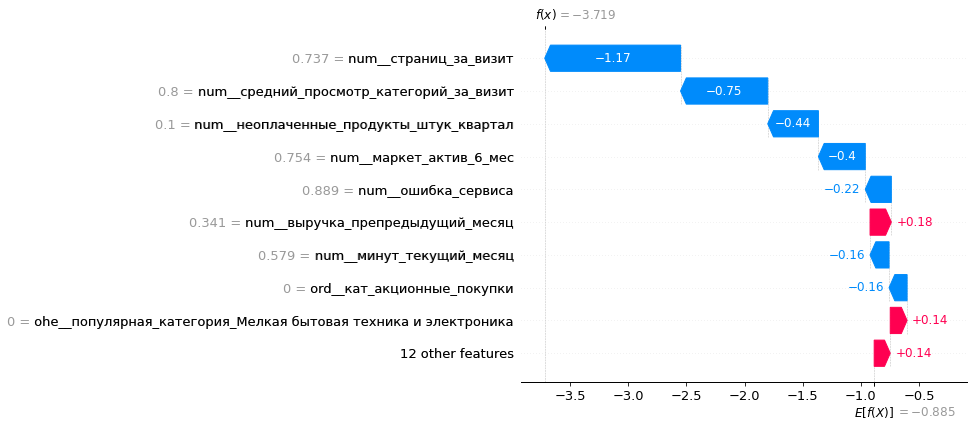

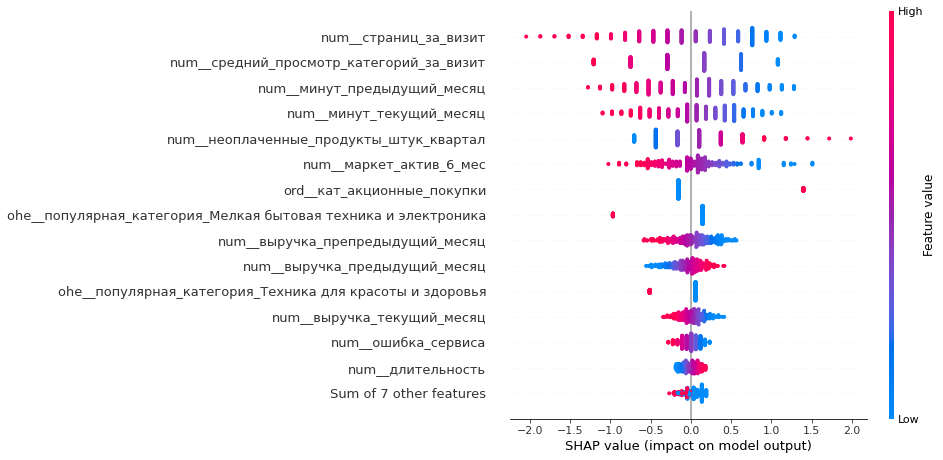

In [80]:
X_train_graph = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_graph)

X_test_graph = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_test_graph = pd.DataFrame(X_test_graph, columns=feature_names)
shap_values = explainer(X_test_graph)

# анализ SHAP-значений
#display(shap.plots.bar(shap_values, max_display=15))
#shap.plots.bar(shap_values, max_display=15)
# перестало работать после какого-то обновления да и бог с ним

shap.plots.waterfall(shap_values[15])

shap.plots.beeswarm(shap_values, max_display=15)


#### Подвывод двух последних разделов:
Одними из самых важных критериев оказались акционные покупки, мелкая бытовая техника и электроника, минуты в предыдущем месяце и число страниц посещенных за визит. 

Лучшие результаты показала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'))] с хорошими метриками ROC-AUC и F1 - их значения превышают 0.9, что является хорошим результатом. К слову - на графиках виден дисбаланс в некоторых признаках, однако это не помешало добиться выского значения для подобранной модели.


## Сегментация покупателей

#### Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
    
    Проведите графическое и аналитическое исследование группы покупателей.
    Сделайте предложения по работе с сегментом для увеличения покупательской активности.
    Сделайте выводы о сегментах:
        Какой сегмент вы взяли для дополнительного исследования,
        Какие предложения вы сделали и почему.

Чтобы выбрать группы пользователей, неплохо было бы понять, а как их вообще сегментировать. Будем считать что плохим событием является снижение покупательской активности, поэтому посмотрим, как разные признаки влияют на этот показатель, а заодно сколько денег приносят пользователи каждой группы, чтобы датафрейм money не простаивал почем зря. В конце концов - ушедший клиент, ушедшие денежки...

In [81]:
# Собираем данные в кучу
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
X_test_total = X_test.copy()
X_test_total['вероятность_снижения'] = y_test_proba


y_train_proba = randomized_search.predict_proba(X_train)[:,1]
X_train_total = X_train.copy()
X_train_total['вероятность_снижения'] = y_train_proba

# Получаем итоговый датафрейм, для которого и будем проводить анализ
X_total = pd.concat([X_train_total, X_test_total])
money = money.set_index('id')
X_total = X_total.join(money)

In [82]:
dframe_info(X_total)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,кат_акционные_покупки,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,20,6,5170.5,4347.0,6014.2,Обычный покупатель,0.063927,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,11,13,6400.0,4597.0,3789.7,Обычный покупатель,0.707052,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,13,10,4113.0,4626.0,3798.4,Обычный покупатель,0.075739,4.37
216564,стандарт,да,5.6,4,342,Кухонная посуда,2,7,5,8,14,19,4930.0,5269.0,4766.2,Черри-пикер,0.697455,5.58
215715,премиум,да,3.6,5,873,Товары для детей,3,2,2,5,10,10,3716.0,4691.0,4600.0,Обычный покупатель,0.745624,4.87


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215858 to 215670
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          1296 non-null   object 
 1   разрешить_сообщать                   1296 non-null   object 
 2   маркет_актив_6_мес                   1296 non-null   float64
 3   маркет_актив_тек_мес                 1296 non-null   int64  
 4   длительность                         1296 non-null   int64  
 5   популярная_категория                 1296 non-null   object 
 6   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 7   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 8   ошибка_сервиса                       1296 non-null   int64  
 9   страниц_за_визит                     1296 non-null   int64  
 10  минут_предыдущий_месяц               1296 non-null   int64  
 11  минут_текущий_месяц    

None

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,4.256404,4.009259,602.967593,3.267747,2.841821,4.184414,8.187500,13.470679,13.210648,4947.468750,4836.202160,5238.096065,0.382332,3.997701
std,1.013525,0.696316,249.195823,1.355125,1.974074,1.951719,3.978459,3.937630,4.221794,700.797239,333.514091,834.318717,0.357164,1.011198
min,0.900000,3.000000,121.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,2890.000000,4098.000000,2758.700000,0.002753,0.860000
25%,3.700000,4.000000,409.500000,2.000000,1.000000,3.000000,5.000000,10.750000,10.000000,4498.125000,4584.500000,4706.050000,0.071702,3.300000
50%,4.200000,4.000000,606.500000,3.000000,3.000000,4.000000,8.000000,13.000000,13.000000,5005.500000,4810.500000,5179.950000,0.211612,4.045000
75%,4.900000,4.000000,806.250000,4.000000,4.000000,6.000000,11.000000,17.000000,16.000000,5405.625000,5056.000000,5759.275000,0.758604,4.670000
max,6.600000,5.000000,1079.000000,6.000000,10.000000,9.000000,20.000000,23.000000,23.000000,6869.500000,5663.000000,7799.400000,0.999037,7.430000


_______________________________________________


Вновь введем функцию для визуализации данных, на этот раз scatterplot

In [83]:
def categ_scatter(column):
    fig = plt.figure(figsize=(15,5))
    sns.scatterplot(data=X_total, y='прибыль', x='вероятность_снижения', hue=column)
    print(f"Строим график для столбца: {column}")
    plt.xlabel('Диаграмма рассеяния вероятности ухода и прибыли')
    plt.ylabel('Прибыль от пользователей')
    plt.title('Диаграмма рассеяния снижения активности от выручки')
    plt.show()

In [84]:
X_total.head(3)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,кат_акционные_покупки,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,Мелкая бытовая техника и электроника,2,4,7,16,20,6,5170.5,4347.0,6014.2,Обычный покупатель,0.063927,4.37
215361,стандарт,да,5.1,4,199,Техника для красоты и здоровья,4,5,2,3,11,13,6400.0,4597.0,3789.7,Обычный покупатель,0.707052,4.03
215884,стандарт,да,4.3,5,997,Мелкая бытовая техника и электроника,5,1,3,11,13,10,4113.0,4626.0,3798.4,Обычный покупатель,0.075739,4.37


Выведем для всех категориальных столбцов:

In [85]:
categ_columns = list(X_total.select_dtypes(include='object').columns)

Строим график для столбца: тип_сервиса


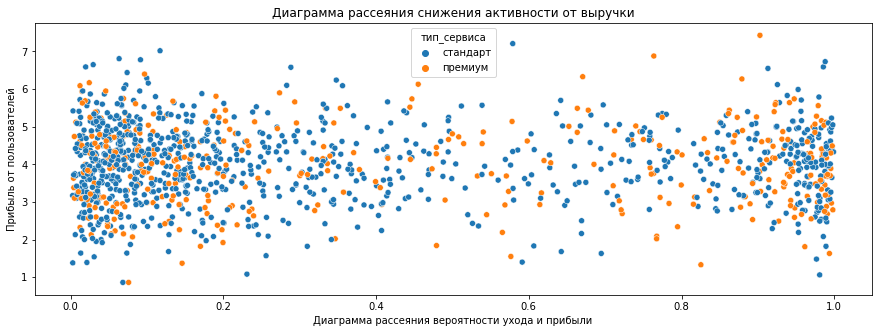

Строим график для столбца: разрешить_сообщать


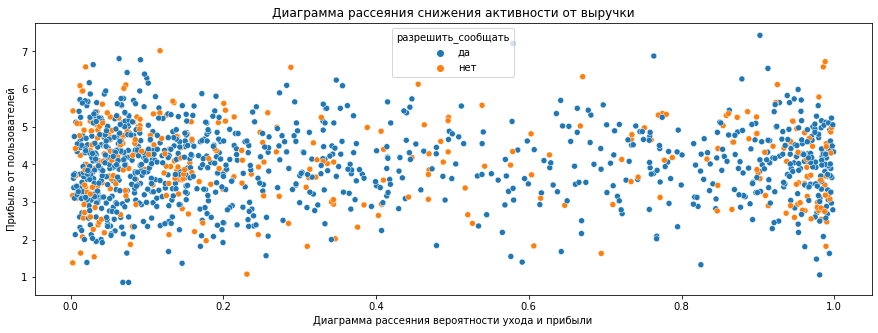

Строим график для столбца: популярная_категория


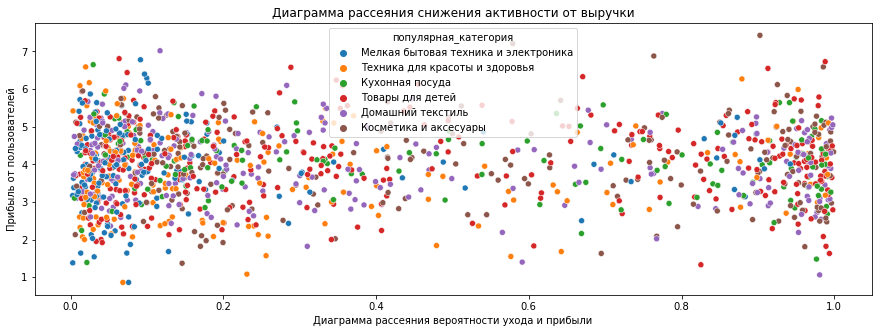

Строим график для столбца: кат_акционные_покупки


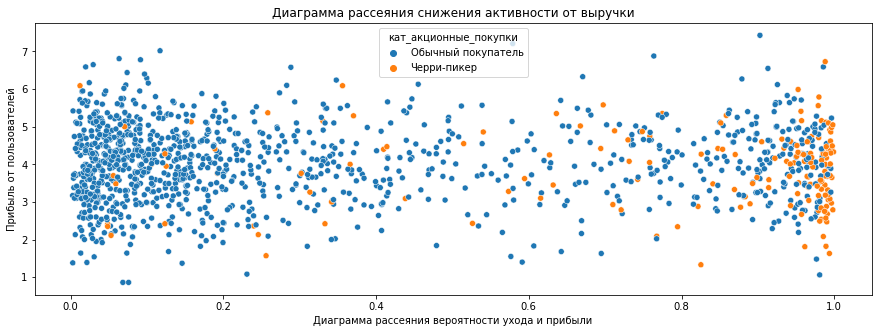

In [86]:
for column in categ_columns:
    categ_scatter(column)

На диаграмме рассеяния снижения активности от выручки для акционных покупок можно заметить, что в зоне риска скорого ухода находятся пользователи, закупающиеся по скидосам. Это абсолютно логично - тот, кто тарится по скидке, будет ждать следующую, так и родились на этот свет магазины дискаунтеры.

В случае категорий товаров, разрешения сообщения и типов данных таких перекосов визуально не наблюдается, поэтому рассматривать будем господ-дискаунтеров.

In [87]:
#Создадим датафрейм где сидят одни черри-пикеры которые очень хотят уйти с платформы
cherry_pickers = X_total.loc[X_total['кат_акционные_покупки'] == 'Черри-пикер']
cherry_pickers = cherry_pickers.loc[cherry_pickers['вероятность_снижения'] > 0.8]

In [88]:
dframe_info(cherry_pickers)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,кат_акционные_покупки,вероятность_снижения,прибыль
id,,,,,,,,,,,,,,,,,,
215448,премиум,да,4.6,4,974,Домашний текстиль,4,3,3,7,9,10,5351.0,4670.0,6129.7,Черри-пикер,0.889758,2.95
215732,стандарт,нет,3.5,4,663,Косметика и аксесуары,3,6,4,3,16,11,5810.0,4955.0,5772.3,Черри-пикер,0.953253,3.51
215537,премиум,да,3.9,4,705,Косметика и аксесуары,3,3,7,4,7,9,6121.5,4974.0,6781.9,Черри-пикер,0.961467,1.81
215741,стандарт,да,4.8,4,563,Товары для детей,1,5,7,4,10,14,3960.0,4809.0,4594.4,Черри-пикер,0.956859,4.29
215408,премиум,да,2.4,3,666,Кухонная посуда,3,5,1,2,10,12,5295.0,4434.0,5029.8,Черри-пикер,0.990709,3.68


<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 215448 to 215670
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          114 non-null    object 
 1   разрешить_сообщать                   114 non-null    object 
 2   маркет_актив_6_мес                   114 non-null    float64
 3   маркет_актив_тек_мес                 114 non-null    int64  
 4   длительность                         114 non-null    int64  
 5   популярная_категория                 114 non-null    object 
 6   средний_просмотр_категорий_за_визит  114 non-null    int64  
 7   неоплаченные_продукты_штук_квартал   114 non-null    int64  
 8   ошибка_сервиса                       114 non-null    int64  
 9   страниц_за_визит                     114 non-null    int64  
 10  минут_предыдущий_месяц               114 non-null    int64  
 11  минут_текущий_месяц     

None

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,вероятность_снижения,прибыль
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,3.454386,3.956140,602.877193,2.517544,4.350877,3.903509,4.052632,9.798246,10.008772,4922.175439,4607.026316,5222.988596,0.959344,3.862281
std,1.034976,0.670363,221.332455,1.138486,2.438564,1.809363,1.666123,2.376805,2.325296,835.866007,213.980086,889.341444,0.044459,0.936598
min,0.900000,3.000000,167.000000,1.000000,0.000000,1.000000,1.000000,5.000000,4.000000,3146.000000,4098.000000,3232.200000,0.821621,1.330000
25%,3.000000,4.000000,453.500000,2.000000,3.000000,3.000000,3.000000,8.000000,8.250000,4395.875000,4445.250000,4597.700000,0.950822,3.205000
50%,3.800000,4.000000,600.000000,2.000000,4.000000,3.500000,4.000000,10.000000,10.000000,5060.500000,4641.500000,5191.850000,0.979411,4.010000
75%,4.100000,4.000000,786.000000,3.000000,6.000000,5.000000,5.000000,11.000000,11.000000,5551.375000,4764.750000,5766.175000,0.989138,4.420000
max,5.600000,5.000000,1064.000000,6.000000,10.000000,8.000000,9.000000,16.000000,17.000000,6716.500000,4990.000000,7799.400000,0.999037,6.730000


_______________________________________________


Имеем 114 заядлых халявщиков, изучим их детальнее, сравнив со средними показателями всего изначального датасета

Столбчатая диаграмма типа сервиса


стандарт    922
премиум     374
Name: тип_сервиса, dtype: int64

Столбчатая диаграмма типа сервиса


стандарт    72
премиум     42
Name: тип_сервиса, dtype: int64

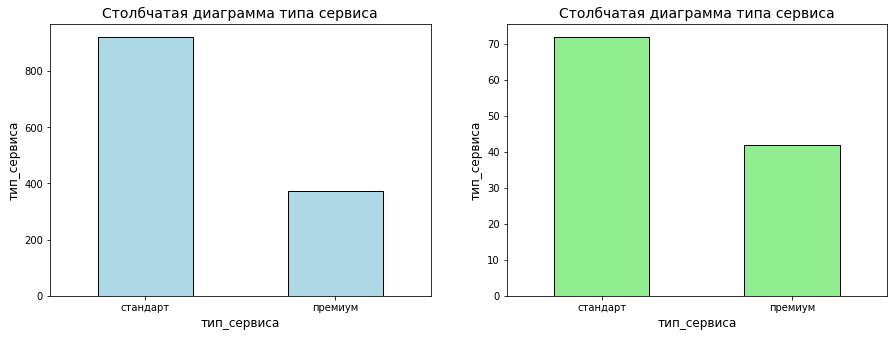

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 строка, 2 столбца
plt.sca(axes[0])
categ_var(market_file, 'тип_сервиса', 'Столбчатая диаграмма типа сервиса', 'lightblue')
plt.sca(axes[1])
categ_var(cherry_pickers, 'тип_сервиса', 'Столбчатая диаграмма типа сервиса', 'lightgreen')

Как ни странно - черри-пикеры чаще пользуются премиум аккаунтами. Возможно, с премиум аккаунтом доступен кешбек или еще большие скидки



Столбчатая диаграмма разрешения о сообщении


да     959
нет    337
Name: разрешить_сообщать, dtype: int64

Столбчатая диаграмма разрешения о сообщении


да     84
нет    30
Name: разрешить_сообщать, dtype: int64

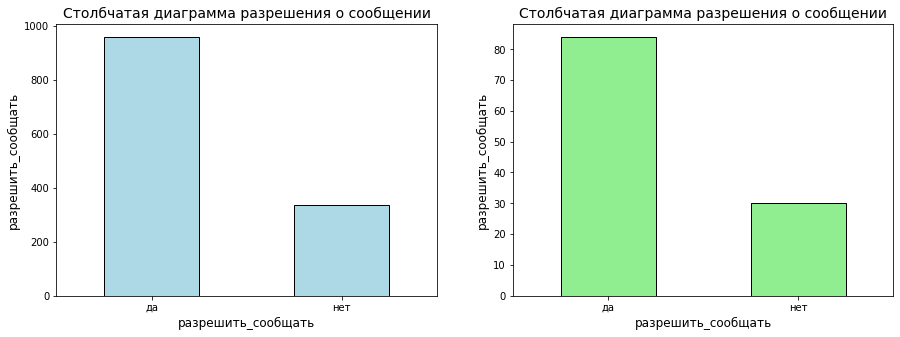

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 строка, 2 столбца
plt.sca(axes[0])
categ_var(market_file, 'разрешить_сообщать', 'Столбчатая диаграмма разрешения о сообщении', 'lightblue')
plt.sca(axes[1])
categ_var(cherry_pickers, 'разрешить_сообщать', 'Столбчатая диаграмма разрешения о сообщении', 'lightgreen')

Визуально значительной разницы не заметно, сообщения любят и не любят одинаково

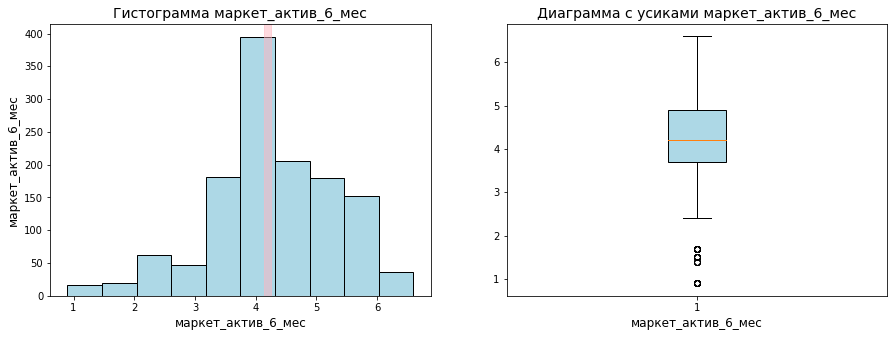

маркет_актив_6_мес


count    1296.000000
mean        4.256404
std         1.013525
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

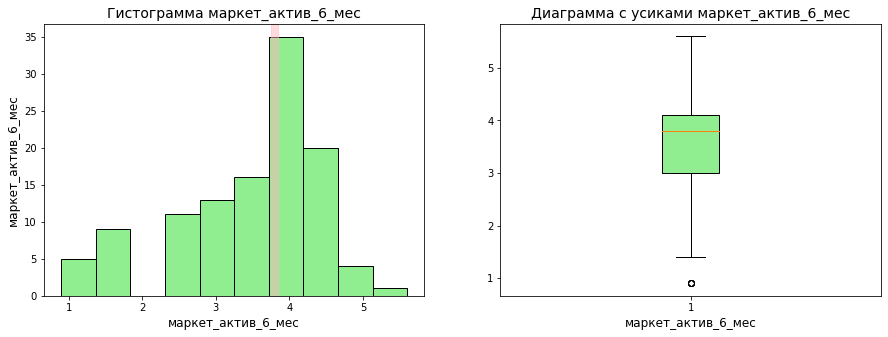

маркет_актив_6_мес


count    114.000000
mean       3.454386
std        1.034976
min        0.900000
25%        3.000000
50%        3.800000
75%        4.100000
max        5.600000
Name: маркет_актив_6_мес, dtype: float64

In [91]:
digit_var(market_file, 'маркет_актив_6_мес', 'маркет_актив_6_мес', 10, 'lightblue')
digit_var(cherry_pickers, 'маркет_актив_6_мес', 'маркет_актив_6_мес', 10, 'lightgreen')

По медиане отлично видно, что актива халявщики проявляют меньше даже за 6 месяцев

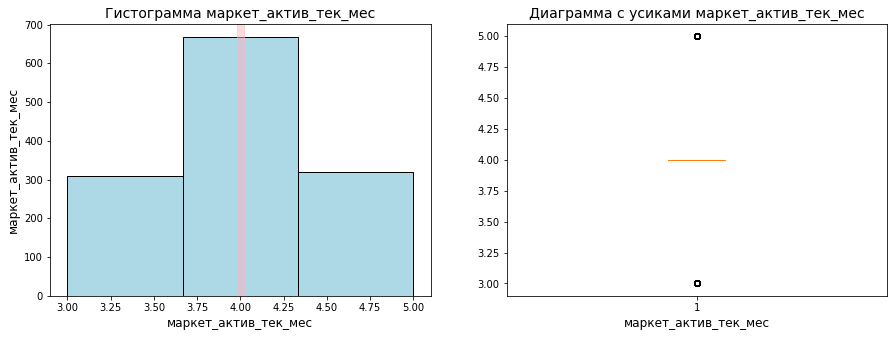

маркет_актив_тек_мес


count    1296.000000
mean        4.009259
std         0.696316
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

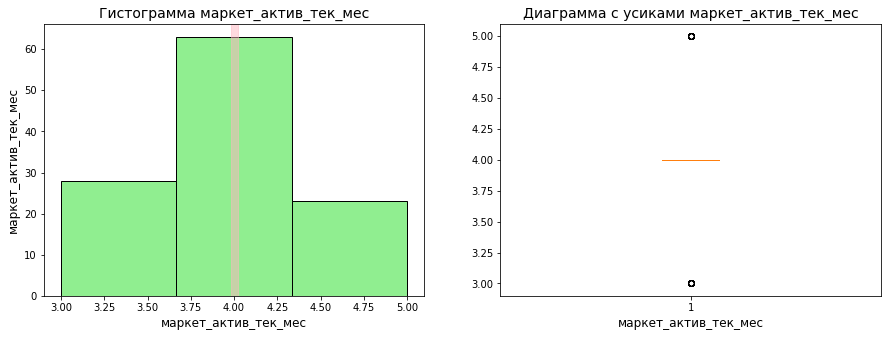

маркет_актив_тек_мес


count    114.000000
mean       3.956140
std        0.670363
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: маркет_актив_тек_мес, dtype: float64

In [92]:
digit_var(market_file, 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 3, 'lightblue')
digit_var(cherry_pickers, 'маркет_актив_тек_мес', 'маркет_актив_тек_мес', 3, 'lightgreen')

В текущем месяце актив сопоставим

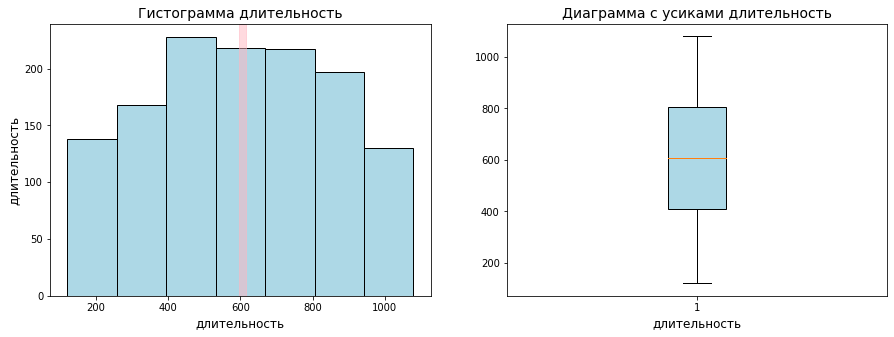

длительность


count    1296.000000
mean      602.967593
std       249.195823
min       121.000000
25%       409.500000
50%       606.500000
75%       806.250000
max      1079.000000
Name: длительность, dtype: float64

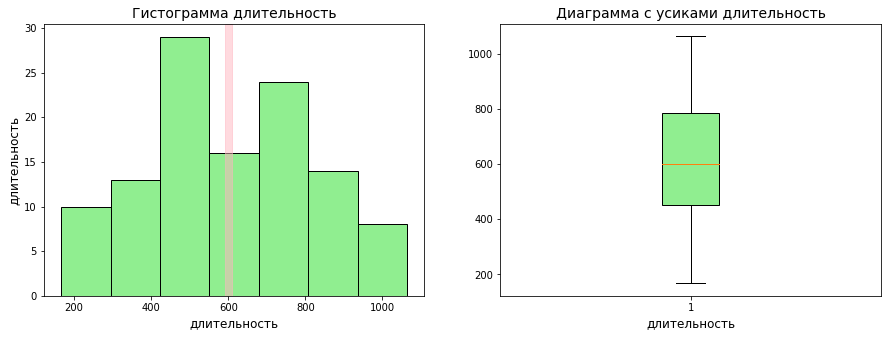

длительность


count     114.000000
mean      602.877193
std       221.332455
min       167.000000
25%       453.500000
50%       600.000000
75%       786.000000
max      1064.000000
Name: длительность, dtype: float64

In [93]:
digit_var(market_file, 'длительность', 'длительность', 7, 'lightblue')
digit_var(cherry_pickers, 'длительность', 'длительность', 7, 'lightgreen')

Исключительно по медиане значения сопоставимы - однако заметно, что черри-пикеры или заходят на короткий промежуток, или целенаправленно выискивают лоты, т.к. есть просадка именно по среднему значению

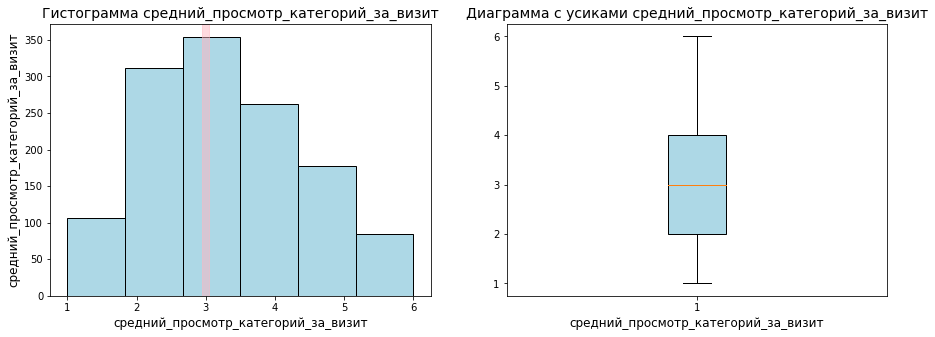

средний_просмотр_категорий_за_визит


count    1296.000000
mean        3.267747
std         1.355125
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64

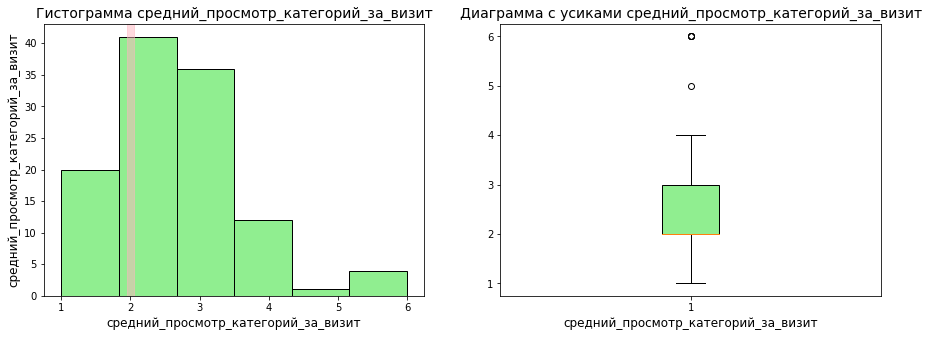

средний_просмотр_категорий_за_визит


count    114.000000
mean       2.517544
std        1.138486
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [94]:
digit_var(market_file, 'средний_просмотр_категорий_за_визит', 'средний_просмотр_категорий_за_визит', 6, 'lightblue')
digit_var(cherry_pickers, 'средний_просмотр_категорий_за_визит', 'средний_просмотр_категорий_за_визит', 6, 'lightgreen')

А вот здесь уже все однозначно - категорий за визит просмотривается меньше (2 против 3 у среднестатистического пользователя)

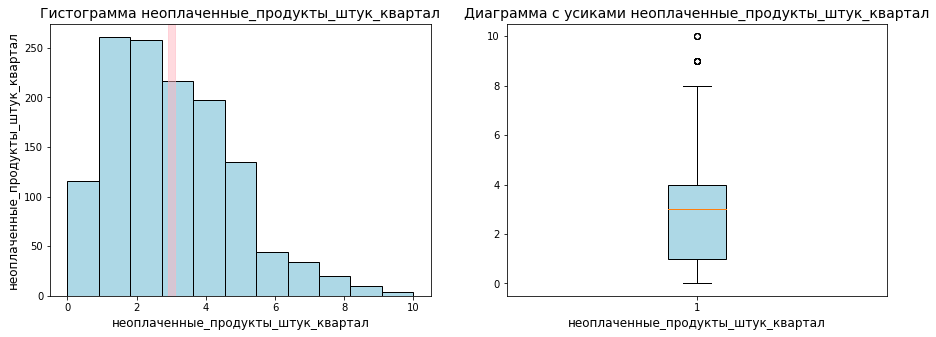

неоплаченные_продукты_штук_квартал


count    1296.000000
mean        2.841821
std         1.974074
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

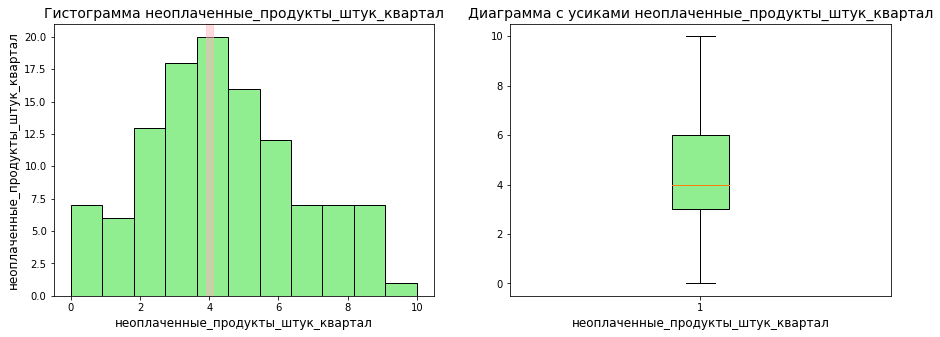

неоплаченные_продукты_штук_квартал


count    114.000000
mean       4.350877
std        2.438564
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [95]:
digit_var(market_file, 'неоплаченные_продукты_штук_квартал', 'неоплаченные_продукты_штук_квартал', 11, 'lightblue')
digit_var(cherry_pickers, 'неоплаченные_продукты_штук_квартал', 'неоплаченные_продукты_штук_квартал', 11, 'lightgreen')

Любители скидок имеют заметно больше неоплаченных товаров (4.3 против 2.8) что говорит о том, что они держат товар в корзине до нужного момента

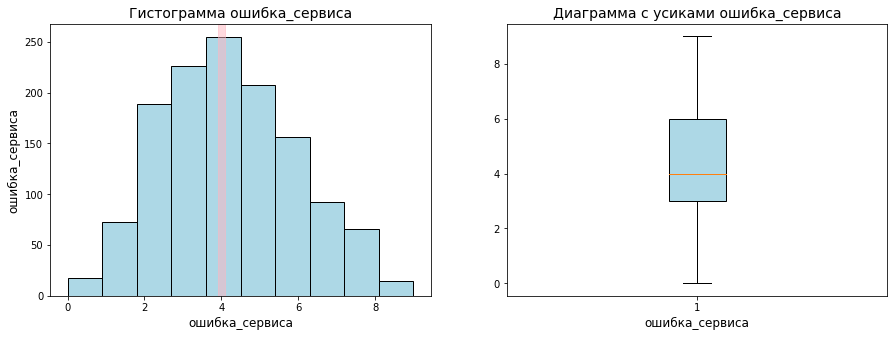

ошибка_сервиса


count    1296.000000
mean        4.184414
std         1.951719
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

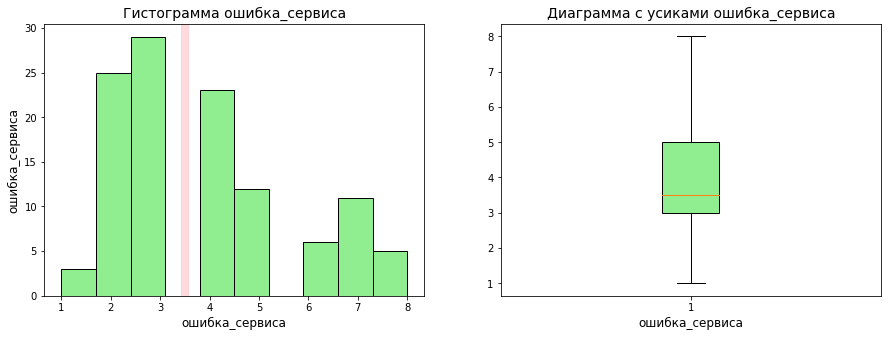

ошибка_сервиса


count    114.000000
mean       3.903509
std        1.809363
min        1.000000
25%        3.000000
50%        3.500000
75%        5.000000
max        8.000000
Name: ошибка_сервиса, dtype: float64

In [96]:
digit_var(market_file, 'ошибка_сервиса', 'ошибка_сервиса', 10,  'lightblue')
digit_var(cherry_pickers, 'ошибка_сервиса', 'ошибка_сервиса', 10,  'lightgreen')

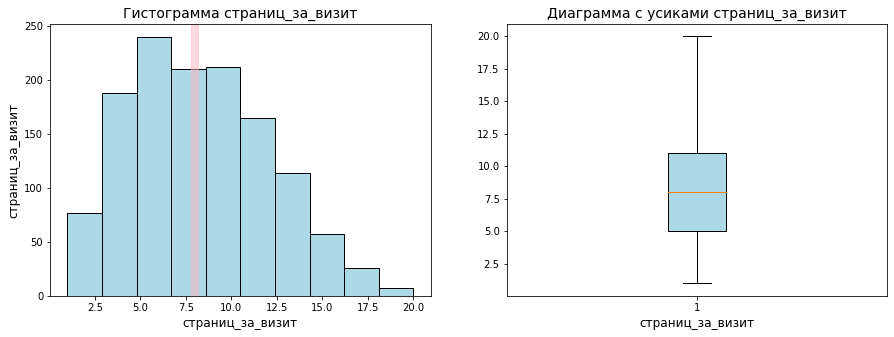

страниц_за_визит


count    1296.000000
mean        8.187500
std         3.978459
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

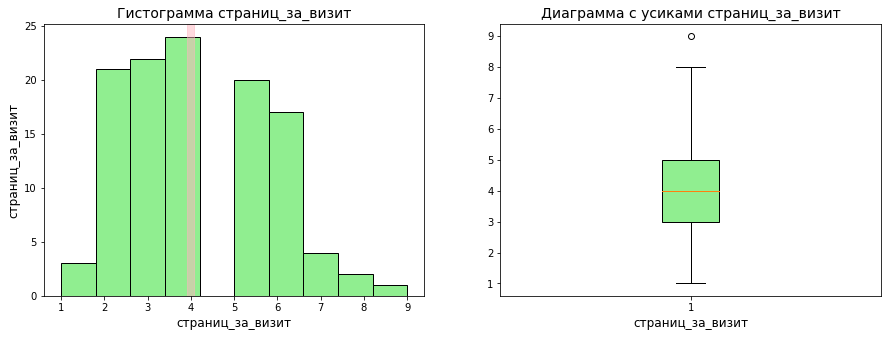

страниц_за_визит


count    114.000000
mean       4.052632
std        1.666123
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: страниц_за_визит, dtype: float64

In [97]:
digit_var(market_file, 'страниц_за_визит', 'страниц_за_визит', 10,  'lightblue')
digit_var(cherry_pickers, 'страниц_за_визит', 'страниц_за_визит', 10,  'lightgreen')

Здесь все так же как и с категориями - страниц черрипикеры просматривают явно меньше (4 страницы против 8 у среднестатистического пользователя)

Столбчатая диаграмма популярной категории (Общие)


Товары для детей                        329
Домашний текстиль                       250
Косметика и аксесуары                   223
Техника для красоты и здоровья          182
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

Столбчатая диаграмма популярной категории (Черри-пикеры)


Товары для детей                        41
Домашний текстиль                       24
Косметика и аксесуары                   20
Кухонная посуда                         16
Техника для красоты и здоровья           9
Мелкая бытовая техника и электроника     4
Name: популярная_категория, dtype: int64

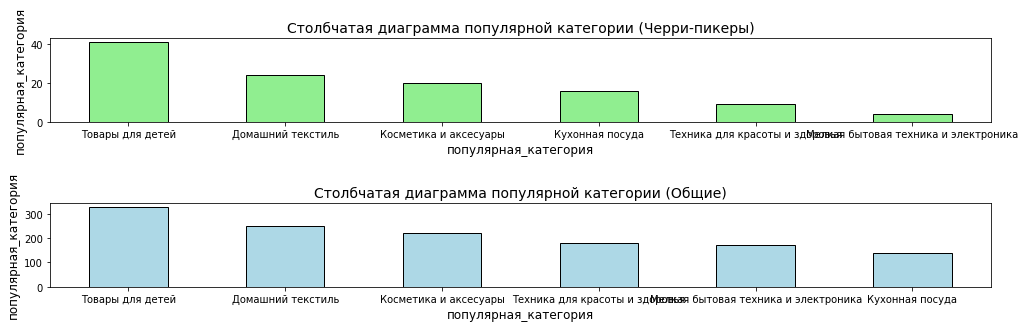

In [98]:

fig, axes = plt.subplots(2, 1, figsize=(10,20))
categ_var(market_file, 'популярная_категория', 'Столбчатая диаграмма популярной категории (Общие)', 'lightblue')
plt.sca(axes[0])

categ_var(cherry_pickers, 'популярная_категория', 'Столбчатая диаграмма популярной категории (Черри-пикеры)', 'lightgreen')
plt.sca(axes[1])
fig.tight_layout(pad=3)
plt.show()

У черри-пикеров явно в предпочтениях товары для детей, и сильно проседает в интересах мелкая бытовая электроника и электроника.

## Общий вывод

   Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Было поручено разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

   В ходе работы были проанализированы данные, предоставленные магазином - проведена предобработка, исправлены недочеты в названиях столбцов, изучены данные, приняты необходимые решения в отношении типов данных - типы данных приведены к нужному виду. Стоит отметить, что данные и изначально были довольно приятными в работе, особенно порадовала возможность пользоваться приличной кириллицей и не держать в голове абстрактные названия столбцов.
   
   В ходе исследовательского анализа данных графическим путем было дентальнее изучено содержание каждого столбца предоставленных датафреймов, выловлены оставшиеся ошибки и аномалии, некоторые данные были позже переведены из численного в категориальный вид для удобства работы.
   
   В ходе корелляционного анализа была построена Phik матрица корреляций для всех числовых и категориальных столбцов датафрейма market_total, благодаря которой было установлено, что наиболее коррелирующими признаками с покупательской активностью являются (по убыванию ст. корреляции):
    
    0,75 - 'страниц_за_визит',
    0,69 - 'минут_предыдущий_месяц',
    0,58 - 'минут_текущий_месяц',
    0,54 - 'средний_просмотр_категорий_за_визит',
    0,54 - 'маркет_актив_6_мес',
    0,51 - 'неоплаченные_продукты_штук_квартал',
    0,51 - 'акционные_покупки',
    0,50 - 'выручка_препредыдущий_месяц'
   
   Далее с помощью пайплайнов лучшие результаты показала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'))] с хорошими метриками ROC-AUC и F1 - их значения превышают 0.9, что в целом является хорошим результатом. Дальнейший анализ важности признаков показал, что одними из самых важных критериев оказались акционные покупки, мелкая бытовая техника и электроника, минуты в предыдущем месяце и число страниц посещенных за визит.
   
   После был найден особый сегмент пользователей, скорее всего снизящий свою активность - черри-пикеры, или по нашему просто скидочники. Данная категория пользователей была изучена отдельно и установлены некоторые ее особенности - так, данные пользователи смотрят меньше страниц (4 против 8 у среднестатистического юзера), держат в корзинах заметно больше товаров в надежде на сочную скидку, смотрят меньше категорий товаров, НО - чаще покупают премиум аккаунт. Организации стоит задуматься над взаимодействием с данным пластом пользователей - организовывать стимулирующие акции, фейковые скидки, программы лояльности - дать людям ощущение квеста и выгоды.
   
   

По полученным данным составим портрет скидочника:

    Скидочник смотрит меньше категорий за заход на сайт (2 против 3 у среднего пользователя)
    Скидочник смотрит меньше страниц за визит (4 против 8.1 у среднего пользователя)
    Скидочник чаще держит покупки в корзине неоплаченными (4.3 против 2.8 у среднего пользователя)
    Скидочник имеет повышенный интерес к детским товарам и пониженный к мелкой электронике (Здесь стоит уточнить, что детские товары в целом самые популярные, но у скидочника отрыв от следующей категории двухкратный)

Предложение - на основании товаров, которые лежат в корзине, а я уверен, что магазин может такое отследить, раз знает их число, предлагать на странице как можно больше товаров по скидке, которые могут заинтересовать пользователя. Скорее всего это будут всякие детские товары и домашний текстиль, но подстройка под конкретную корзину всегда приятнее.

При этом важно, чтобы все было на одной странице, т.к. как становится понятно из 'портрета' выше, много вкладок и категорий он посещать не будет. Также важно, чтобы товары были наиболее интересной категории, т.к. скидочники в среднем посещают не более 2 категорий за раз.